<a href="https://colab.research.google.com/github/dhiru-c/Cardiovascular_Risk_Prediction_Capstone_Project/blob/main/Cardiovascular_Risk_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b>The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.</b>



## <b>Data Description </b>
### <b>Demographic:</b>
* ### Sex: male or female("M" or "F")
* ### Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral
* ### is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* ###  Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
* ###  BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* ###  Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* ###  Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* ###  Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
* ###  Tot Chol: total cholesterol level (Continuous)
* ###  Sys BP: systolic blood pressure (Continuous)
* ###  Dia BP: diastolic blood pressure (Continuous)
* ###  BMI: Body Mass Index (Continuous)
* ###  Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* ###  Glucose: glucose level (Continuous)
Predict variable (desired target)
* ###  10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV




# **Data Preparation**

## **Importing and Inspecting Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBRFClassifier


import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('https://drive.google.com/uc?id=1cLHnV4i76jY4t5-dvZuXwntO5G3gYnJ0')

In [3]:
data.shape

(3390, 17)

In [4]:
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
data.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
# Dropping the id column
data.drop(columns=['id'], inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [8]:
data.describe(include='all',percentiles=(0.01,0.25,0.5,0.75,0.99))

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
1%,35.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,153.000000,96.94500,60.000000,18.252500,52.880000,55.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000


## **Missing Values Treatment**

In [9]:
#checking null values
print(data.isnull().sum().sort_values(ascending=False))
print('--*--' *10)
round(data.isnull().sum().sort_values(ascending=False)/len(data)*100,2)

glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
age                  0
sex                  0
is_smoking           0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64
--*----*----*----*----*----*----*----*----*----*--


glucose            8.97
education          2.57
BPMeds             1.30
totChol            1.12
cigsPerDay         0.65
BMI                0.41
heartRate          0.03
age                0.00
sex                0.00
is_smoking         0.00
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
sysBP              0.00
diaBP              0.00
TenYearCHD         0.00
dtype: float64

In [10]:
# Replacing null values with the median
for col in ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']:
  data[col] = data[col].fillna(data[col].median())

# **Exploratory Data Analysis**

In [11]:
# Lets check the discrete and continuous features
categorical_features = [i for i in data.columns if data[i].nunique()<=4]
numeric_features = [i for i in data.columns if i not in categorical_features]

print(categorical_features)
print(numeric_features)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


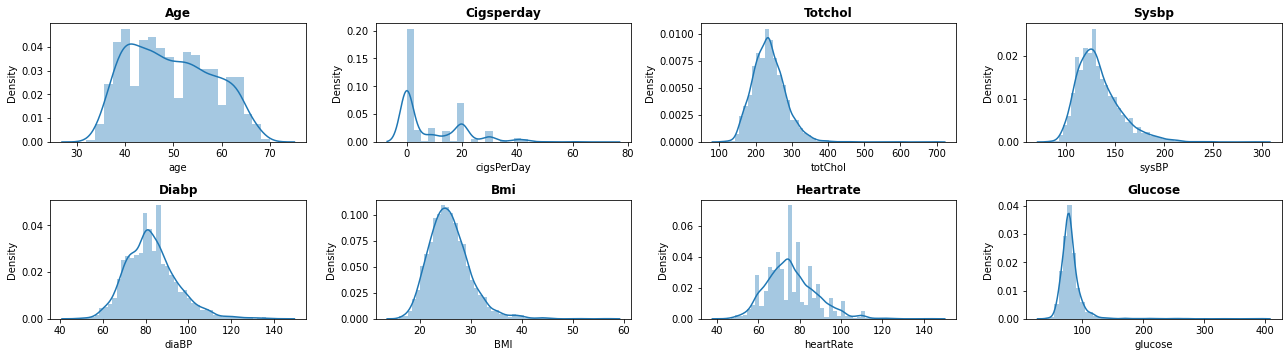

In [12]:
# Visualizing the distributions.
plt.figure(figsize=(18,12))
for n,column in enumerate(numeric_features):
  plt.subplot(5, 4, n+1)
  sns.distplot(data[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

## **Handling Outliers**

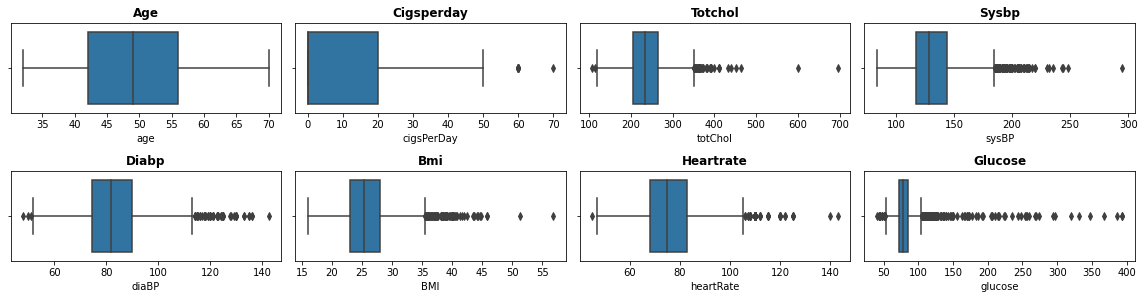

In [13]:
# Visualizing the distributions.
plt.figure(figsize=(16,10))
for n,column in enumerate(numeric_features):
  plt.subplot(5,4,n+1) 
  sns.boxplot(data[column])
  plt.title(f'{column.title()}', weight='bold')
  plt.tight_layout()

In [14]:
# Removing outliers by standard methods and Plotting graphs:
df = data.copy()
for col in numeric_features:
  q1,q3,median = df[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers with median value
  df[col]= np.where(df[col] > upper_limit, median, np.where(
                        df[col] < lower_limit,median,df[col]))

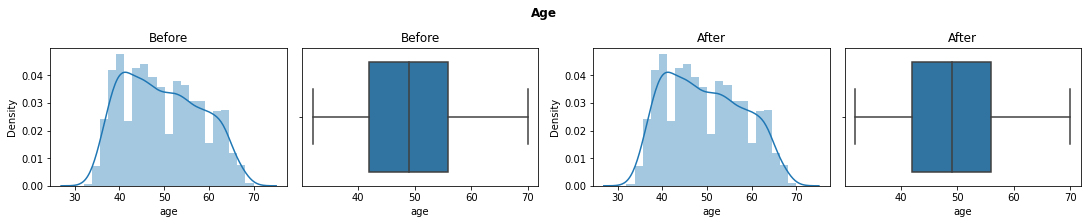

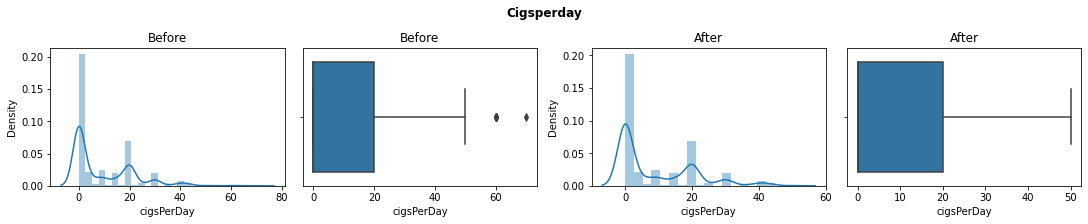

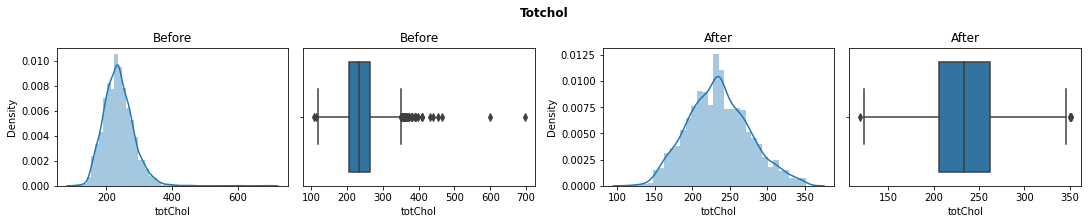

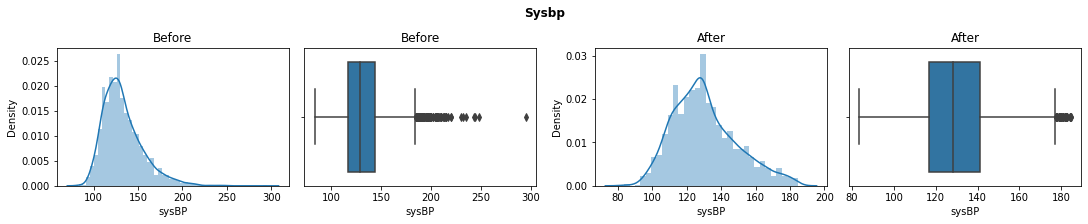

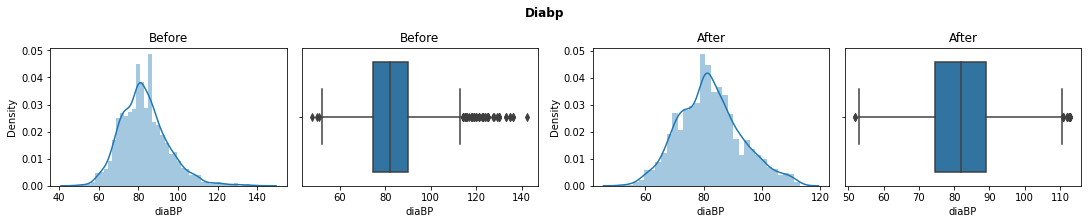

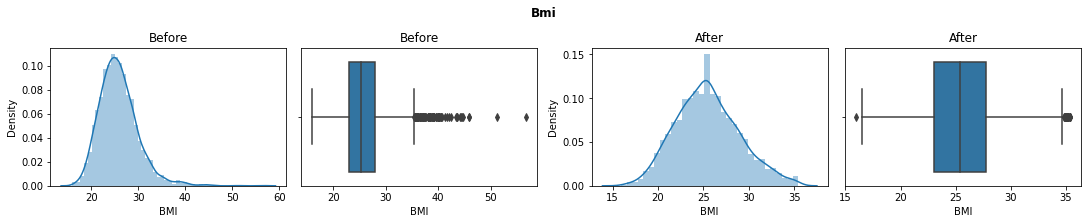

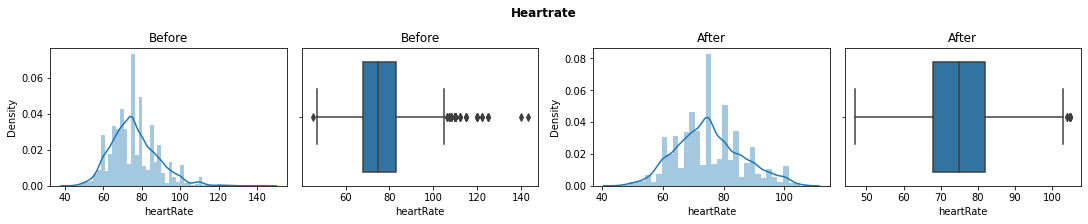

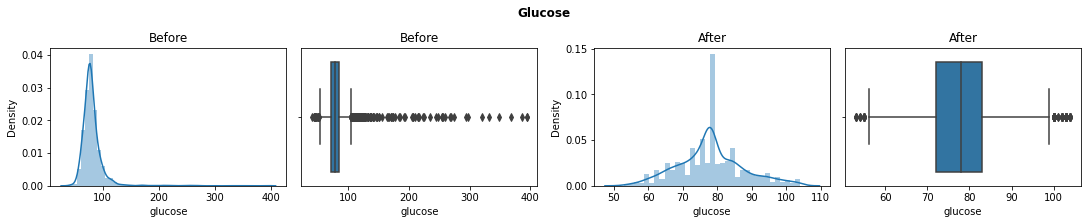

In [15]:
# Plotting Graphs Before treating outliers 
for col in numeric_features:
  fig, ax =plt.subplots(1,4, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.distplot(data[col], ax=ax[0]).set(title="Before")
  sns.boxplot(data[col], ax=ax[1]).set(title="Before")
  # After treating outliers
  sns.distplot(df[col], ax=ax[2]).set(title="After")
  sns.boxplot(df[col], ax=ax[3]).set(title="After")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

In [16]:
# duplicate
len(df[df.duplicated()])

0

##**Univariate Analysis**

In [17]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
  '''Takes axes as input and labels the percent count of each bar in a countplot'''
  for p in plot.patches:
    total = sum(p.get_height() for p in plot.patches)/100
    percent = round((p.get_height()/total),2)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

In [18]:
# Defining r to autofit the number and size of plots
r = np.ceil(len(data.columns)/3)

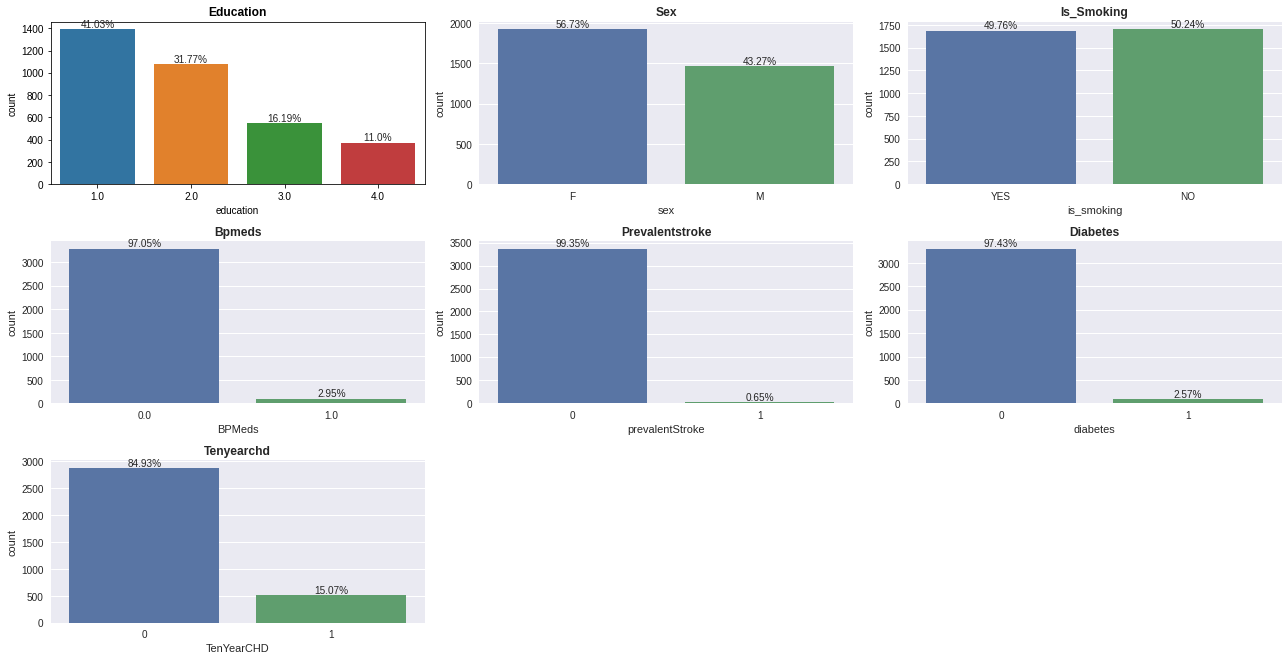

In [19]:
n=1
plt.figure(figsize=(18,r*3))
for column in ['education', 'sex', 'is_smoking', 'BPMeds',
       'prevalentStroke', 'diabetes',
        'TenYearCHD']:
  plot = plt.subplot(r,3,n)
  n = n+1
  sns.countplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.style.use('seaborn')
  plt.tight_layout()
  annot_percent(plot)

##**Cleaning and Manipulating dataset**

In [20]:
# Checking unique value with their counts in categorical features
for col in ['sex', 'is_smoking','TenYearCHD']:
  print(df[col].value_counts(),'\n')

F    1923
M    1467
Name: sex, dtype: int64 

NO     1703
YES    1687
Name: is_smoking, dtype: int64 

0    2879
1     511
Name: TenYearCHD, dtype: int64 



In [21]:
# Defining a label encoder based on above data
encoder = {'sex':{'M':1, 'F':0},'is_smoking':{'YES':1, 'NO': 0}}

# Label Encoding
df = df.replace(encoder)

In [22]:
# Checking Whether all features are numeric or not
len(df.columns) == len(df.describe().columns)

True

In [23]:
# New look and creating copy of df
df1=df.copy()
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64.0,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36.0,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46.0,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50.0,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64.0,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


##**visualising statistic of data**

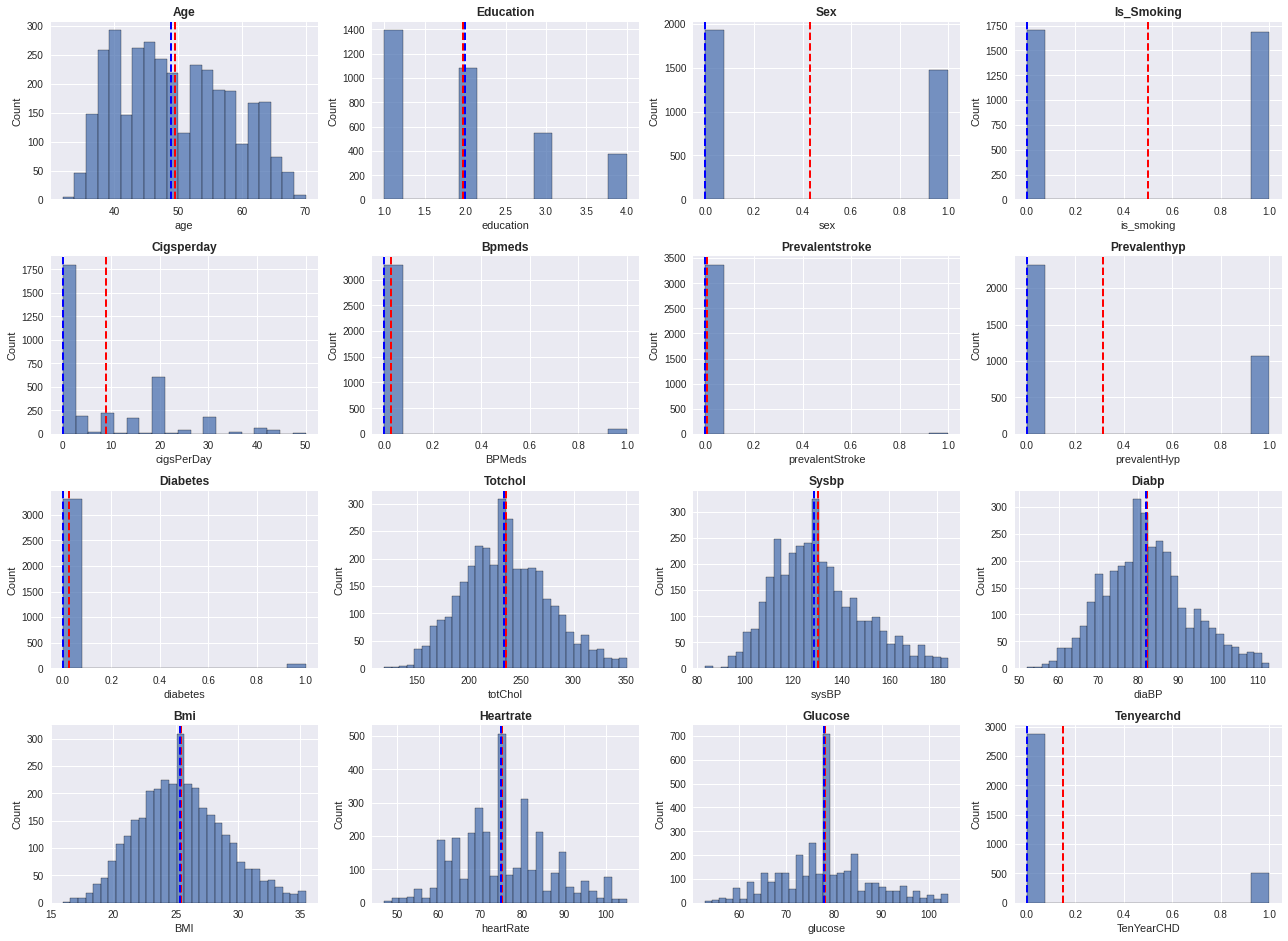

In [24]:
# Visualizing the mean and median.
plt.figure(figsize=(18,16))
for n,column in enumerate(df.columns):
  feature = df[column]
  ax=plt.subplot(5, 4, n+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

##**Bivariate Analysis**

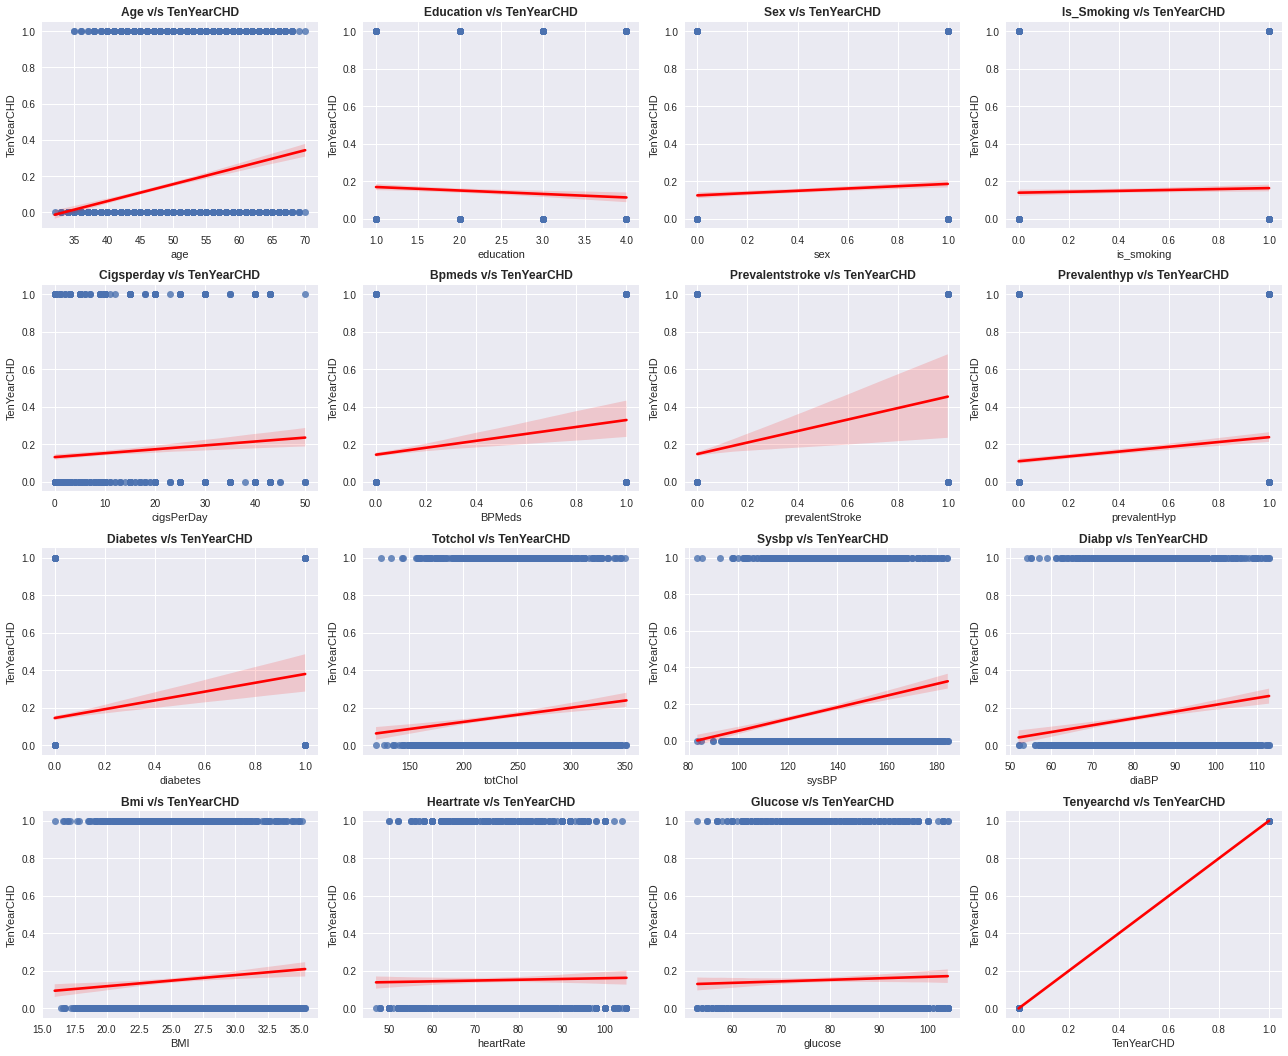

In [25]:
# Checking Linearity
independent_variables = [i for i in df.columns if i not in ['TenYearCHD']]

plt.figure(figsize=(18,18))
for n,column in enumerate(df.columns ):
  plt.subplot(5, 4, n+1)
  sns.regplot(x = df[column], y =df['TenYearCHD'],line_kws={"color": "red"})
  plt.title(f'{column.title()} v/s TenYearCHD',weight='bold')
  plt.tight_layout()

##**Removing Multicolinearity**

In [26]:
# Defining a function to calculate Variance Inflation factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))

VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable. VIF score of an independent variable represents how well the variable is explained by other independent variables.

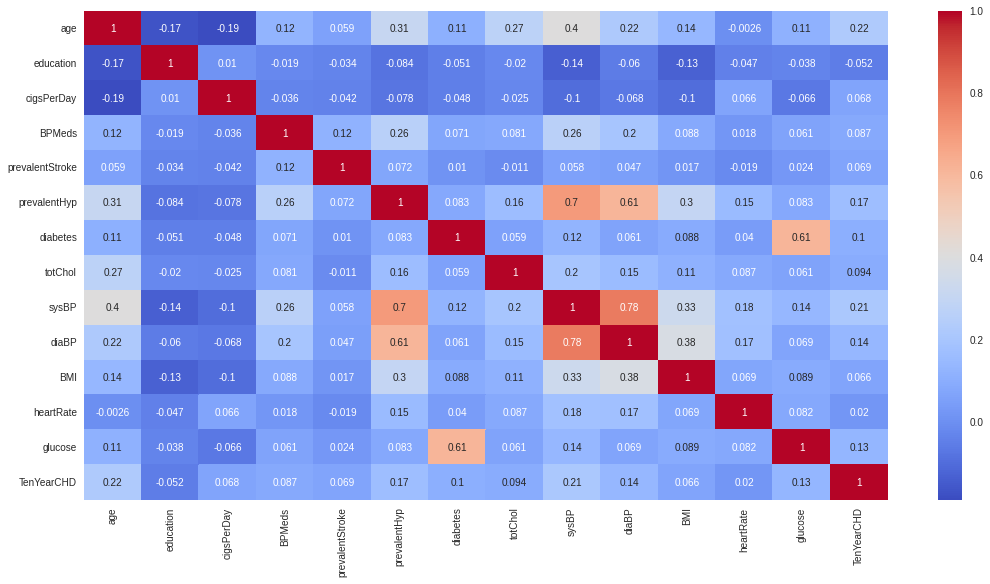

In [27]:
#  annot=True, cmap='coolwarm'
plt.figure(figsize=(18,9))
sns.heatmap(data[data.describe().columns].corr(),annot=True, cmap='coolwarm')

In [28]:
import statsmodels.api as lm
ols_x_train = lm.add_constant(df[independent_variables])
sm          = lm.OLS(df['TenYearCHD'],ols_x_train).fit()

print(sm.summary())

                            OLS Regression Results                            
Dep. Variable:             TenYearCHD   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     22.08
Date:                Sun, 27 Feb 2022   Prob (F-statistic):           1.98e-58
Time:                        06:00:37   Log-Likelihood:                -1167.2
No. Observations:                3390   AIC:                             2366.
Df Residuals:                    3374   BIC:                             2464.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.4398      0.098     

In [29]:
df.drop(['education','is_smoking','heartRate','BMI','totChol','glucose'],axis=1,inplace=True)

In [30]:
independent_variables = [i for i in df.columns if i not in ['TenYearCHD']]
calc_vif(df[independent_variables])

# ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
# ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

,variables,VIF
0,sysBP,123.524971
1,diaBP,99.935631
2,age,34.618335
3,sex,2.002542
4,prevalentHyp,1.917885
5,cigsPerDay,1.792709
6,BPMeds,1.120774
7,diabetes,1.043691
8,prevalentStroke,1.024397


In [31]:
df.drop(['sysBP','diaBP'],axis=1,inplace=True)

In [32]:
independent_variables = [i for i in df.columns if i not in ['TenYearCHD']]
calc_vif(df[independent_variables])

,variables,VIF
0,age,2.555058
1,sex,1.958771
2,cigsPerDay,1.722460
3,prevalentHyp,1.669085
4,BPMeds,1.120401
5,diabetes,1.041588
6,prevalentStroke,1.023992


In [33]:
ols_x_train = lm.add_constant(df[independent_variables])
sm          = lm.OLS(df['TenYearCHD'],ols_x_train).fit()

print(sm.summary())

                            OLS Regression Results                            
Dep. Variable:             TenYearCHD   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     46.36
Date:                Sun, 27 Feb 2022   Prob (F-statistic):           4.18e-63
Time:                        06:00:37   Log-Likelihood:                -1170.6
No. Observations:                3390   AIC:                             2357.
Df Residuals:                    3382   BIC:                             2406.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3465      0.037     

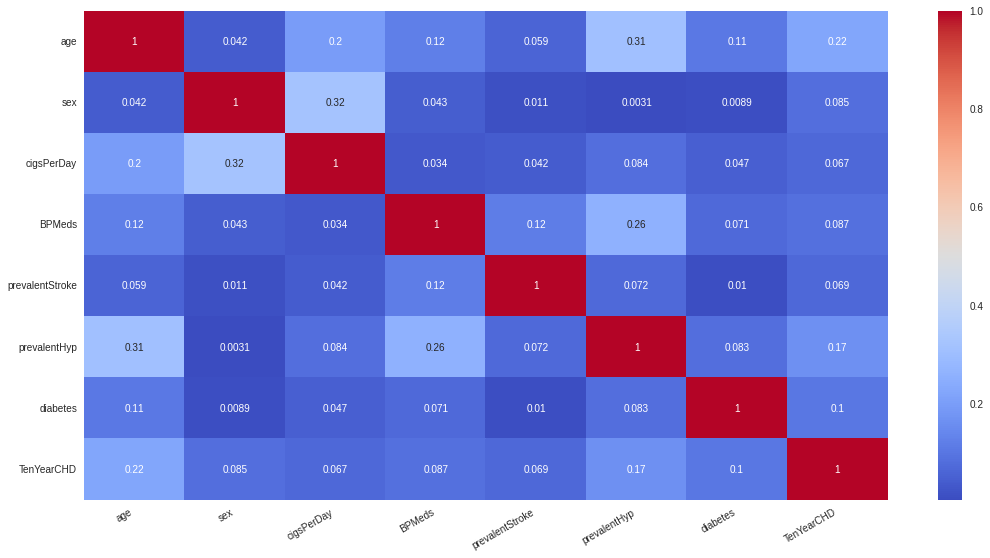

In [34]:
# Updating the dataset
dataset = df[independent_variables + ['TenYearCHD']]

#checking corelations
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(dataset.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [35]:
# Checking top 5 rows of the cleaned dataset
dataset.head()

,age,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,64.0,0,3.0,0.0,0,0,0,1
1,36.0,1,0.0,0.0,0,1,0,0
2,46.0,0,10.0,0.0,0,0,0,0
3,50.0,1,20.0,0.0,0,1,0,1
4,64.0,0,30.0,0.0,0,0,0,0


#**Model building**

##**Prerequisites**

In [36]:
# Defining variables required
scaler = MinMaxScaler()
features = [i for i in df1.columns if i not in ['TenYearCHD']]

In [37]:
# Splitting the data into train and test
x = scaler.fit_transform(df[independent_variables])
y = df['TenYearCHD']

In [38]:
#Handling imbalance dataset
from imblearn.combine import SMOTETomek

smk = SMOTETomek(random_state=42)
X_new,  y_new = smk.fit_resample(x, y)

X_new.shape,y_new.shape

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))

Original dataset shape Counter({0: 2879, 1: 511})
Resampled dataset shape Counter({1: 2815, 0: 2815})


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y_new , test_size = 0.2, random_state = 0)

In [40]:
# # Fitting Linear Regression lr
# lr = LogisticRegression(fit_intercept=True, max_iter=10000)
# lr.fit(X_train,y_train)

In [41]:
# Defining a function to train the input model and print evaluation matrix
def analyse_model(model, X_train, X_test, y_train, y_test):

  '''Takes regressor model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''

  # Fitting the model
  model.fit(X_train,y_train)

  # Feature importances
  try:
    try:
      importance = model.feature_importances_
      feature = features
    except:
      importance = np.abs(model.coef_[0])
      feature = independent_variables
    indices = np.argsort(importance)
    indices = indices[::-1]
  except:
    pass

  # Plotting Evaluation Metrics for train and test dataset
  for x, act, label in ((X_train, y_train, 'Train-Set'),(X_test, y_test, "Test-Set")):
    # Getting required metrics
    pred = model.predict(x)
    pred_proba = model.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=act, output_dict=True))
    # report = classification_report(y_pred=pred, y_true=act)
    fpr, tpr, thresholds = roc_curve(act, pred_proba)

    # Classification report
    # print(report)
    plt.figure(figsize=(18,3))
    plt.subplot(1,3,1)
    sns.heatmap(report.iloc[:-1, :].T, annot=True, cmap='coolwarm')
    plt.title(f'{label} Report')

    # Confusion Matrix
    plt.subplot(1,3,2)
    sns.heatmap(confusion_matrix(y_true=act, y_pred=pred), annot=True, cmap='coolwarm')
    plt.title(f'{label} Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')

    # AUC_ROC Curve
    plt.subplot(1,3,3)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
    plt.legend(loc=4)
    plt.title(f'{label} AUC_ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()

  # # Plotting actual and predicted values:
  # plt.figure(figsize=(18,3))
  # plt.plot((pred)[:100])
  # plt.plot((np.array(y_test)[:100]))
  # plt.legend(["Predicted","Actual"])
  # plt.title('Actual and Predicted Labels')
  # plt.tight_layout()
  # Plotting Feature Importance
  try:
    plt.figure(figsize=(18,3))
    plt.bar(range(len(indices)),importance[indices])
    plt.xticks(range(len(indices)), [feature[i] for i in indices])
    plt.title('Feature Importance')
    plt.tight_layout()
  except:
    pass
  plt.show()

  print(f'predected percent of people with Cardiovascular Risk  : {(sum( pred)/ pred.size )*100}')

  return model

##**Logistic Regression**

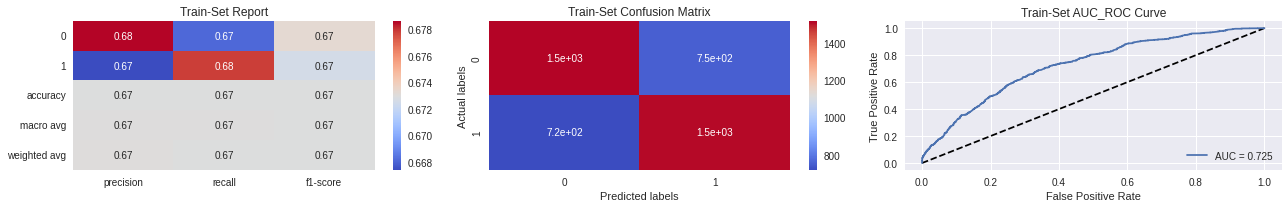

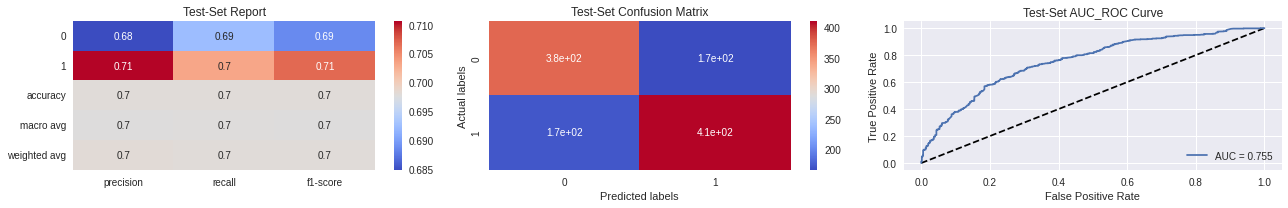

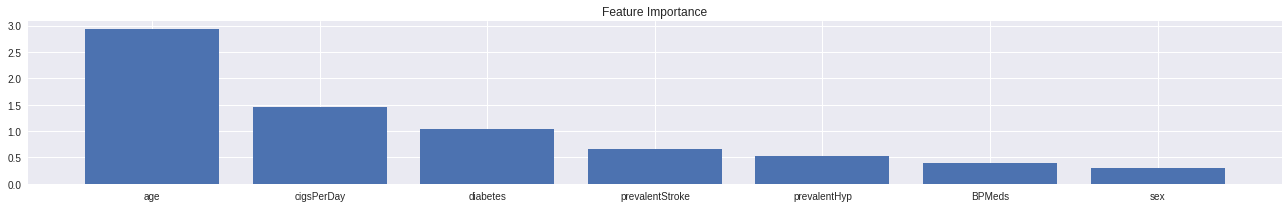

predected percent of people with Cardiovascular Risk  : 51.243339253996446


LogisticRegression(max_iter=10000)

In [42]:
# Fitting Linear Regression Model
lr = LogisticRegression(fit_intercept=True, max_iter=10000)
analyse_model(lr, X_train, X_test, y_train, y_test)

##**KNN Classifier**

KNeighborsClassifier()


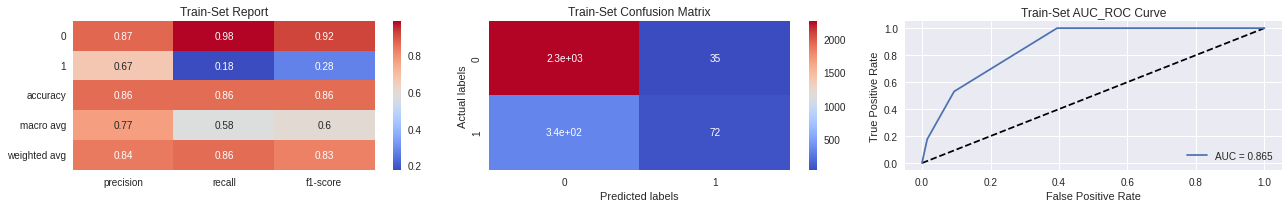

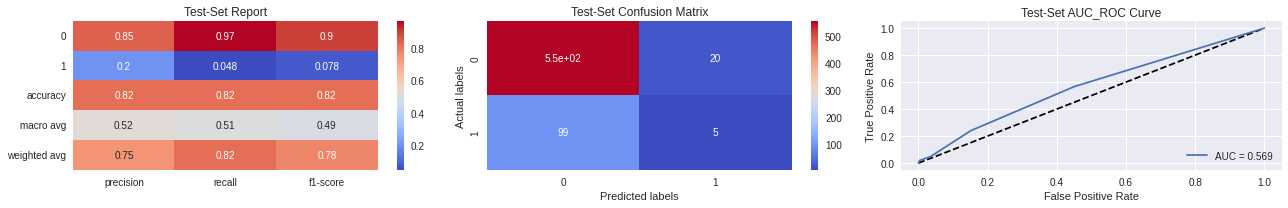

<Figure size 1296x216 with 0 Axes>

predected percent of people with Cardiovascular Risk  : 3.687315634218289


KNeighborsClassifier()

In [50]:
#fitting KNN model
# Classifier
clf = KNeighborsClassifier()

# HYperparameter Grid
grid = {'n_neighbors' : (5,7,9)}

# GridSearch to find the best parameters
knn = GridSearchCV(clf, param_grid = grid, scoring = 'f1', cv=5)
knn.fit(X_train, y_train)
print(knn.best_estimator_)

# Analysing the model with best set of parametes
analyse_model(knn.best_estimator_, X_train, X_test, y_train, y_test)

##**Naive Bayes Classifier**

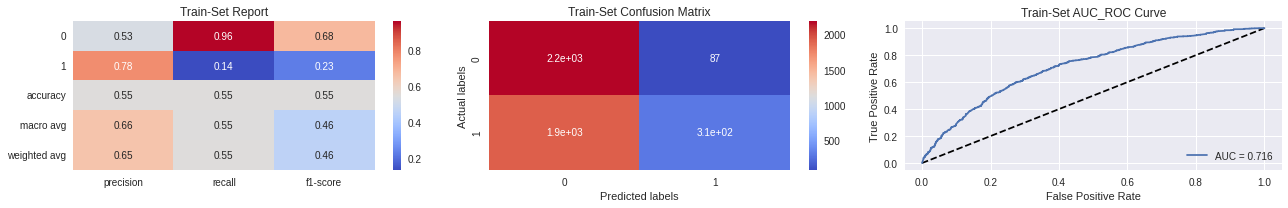

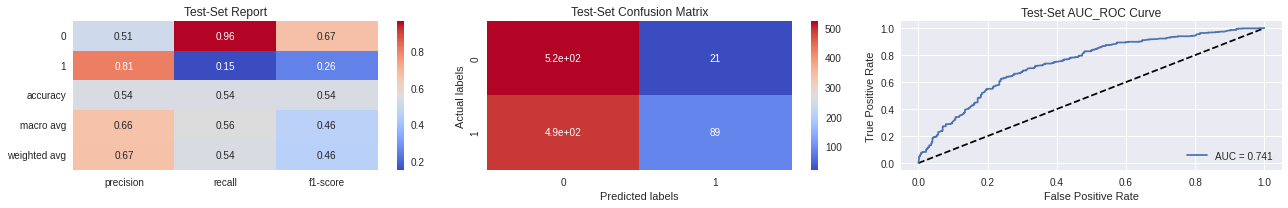

<Figure size 1296x216 with 0 Axes>

predected percent of people with Cardiovascular Risk  : 9.769094138543517


GaussianNB()

In [44]:
#naive bayes 
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# Analysing the model 
analyse_model(gnb, X_train, X_test, y_train, y_test)

##**Support Vector Classifier**

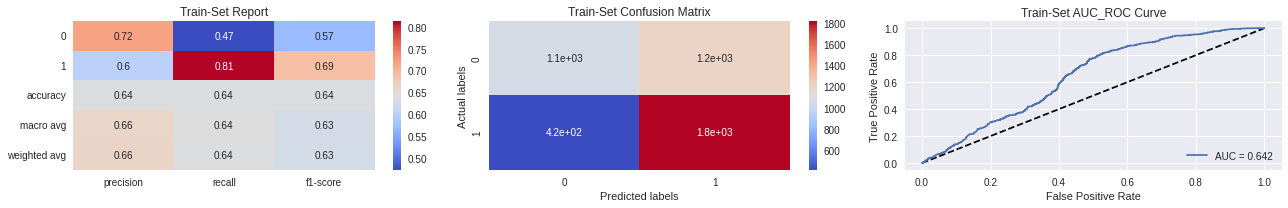

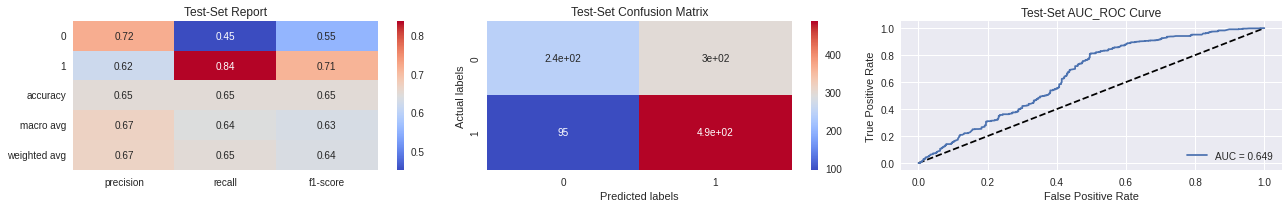

<Figure size 1296x216 with 0 Axes>

predected percent of people with Cardiovascular Risk  : 69.80461811722914


SVC(max_iter=1000, probability=True, random_state=0)

In [45]:
#svm algorithm
from sklearn.svm import SVC
clf=SVC(random_state= 0,probability=True)

# HYperparameter Grid
grid = {'kernel': ["linear","rbf","poly","sigmoid"], 'max_iter' :(700,1000) }

# GridSearch to find the best parameters
svc = GridSearchCV(clf, param_grid = grid, scoring = 'f1', cv=5)
svc.fit(X_train, y_train)


# Analysing the model with best set of parametes
analyse_model(svc.best_estimator_, X_train, X_test, y_train, y_test)




##**Decision Tree Classifier**

In [46]:
# Splitting the data into train and test by redefining X
x = scaler.fit_transform(df1[features])
X_train, X_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 0)

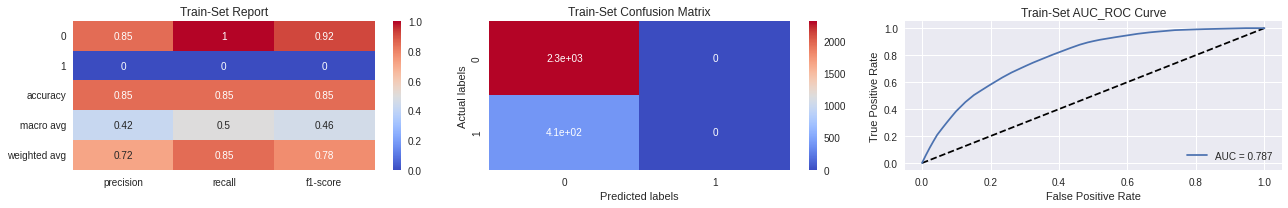

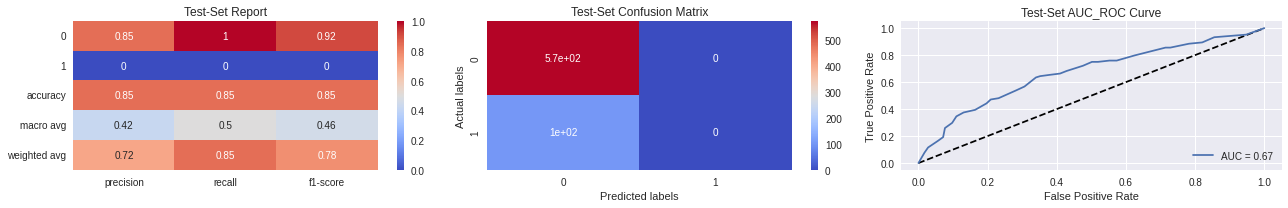

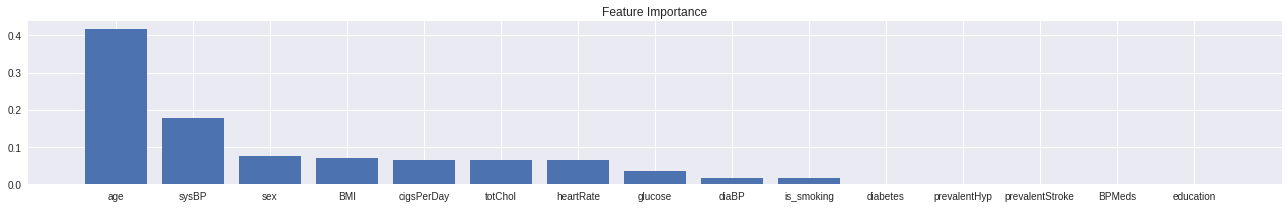

predected percent of people with Cardiovascular Risk  : 0.0


DecisionTreeClassifier(max_depth=6, min_samples_leaf=40, min_samples_split=50,
                       random_state=1)

In [47]:
# Classifier
clf = DecisionTreeClassifier(random_state=1)

# HYperparameter Grid
grid = {'max_depth' : [4,6,8],
        'min_samples_split' : [50,100,150],
        'min_samples_leaf' : [40,50]}

# GridSearch to find the best parameters
dt = GridSearchCV(clf, param_grid = grid, scoring = 'f1', cv=5)
dt.fit(X_train, y_train)

# Analysing the model with best set of parametes
analyse_model(dt.best_estimator_, X_train, X_test, y_train, y_test)

##**Random Forest Classifier**

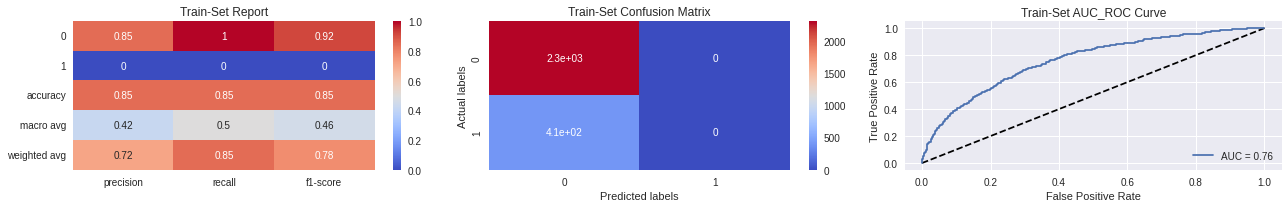

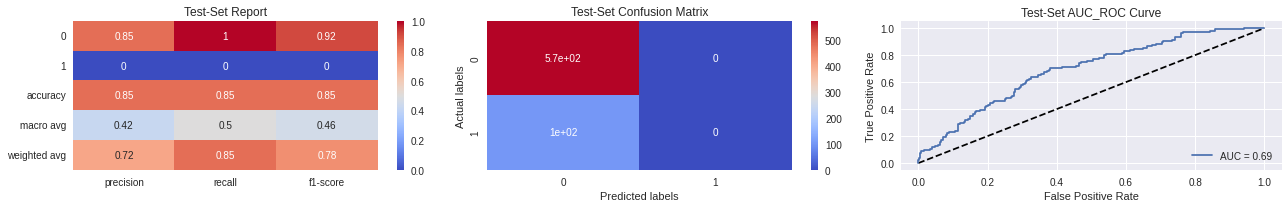

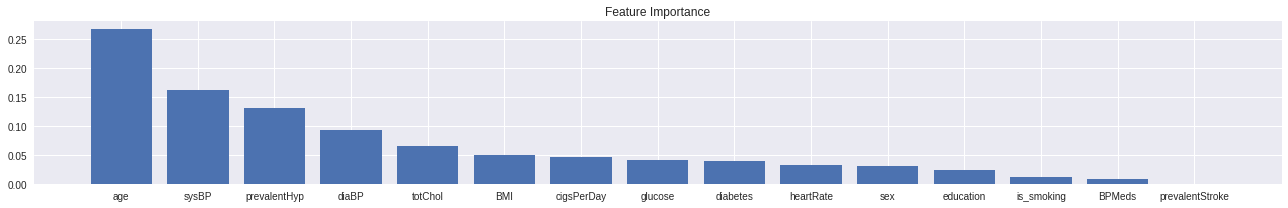

predected percent of people with Cardiovascular Risk  : 0.0


RandomForestClassifier(max_depth=4, min_samples_leaf=40, min_samples_split=50,
                       n_estimators=50, random_state=2)

In [48]:
# Classifier
clf = RandomForestClassifier(random_state=2)

# HYperparameter Grid
grid = {'n_estimators' : [50,100,150],
        'max_depth' : [4,6,8],
        'min_samples_split' : [50,100,150],
        'min_samples_leaf' : [40,50]}

# GridSearch to find the best parameters
rf = GridSearchCV(clf, param_grid = grid, scoring = 'f1', cv=5)
rf.fit(X_train, y_train)

# Analysing the model with best set of parametes
analyse_model(rf.best_estimator_, X_train, X_test, y_train, y_test)

##**XGBoost Classifier**

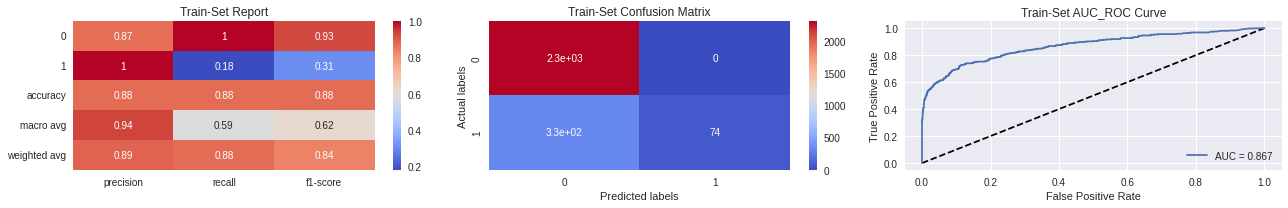

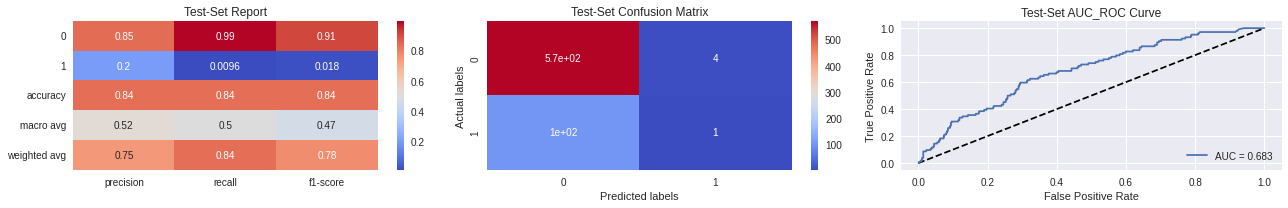

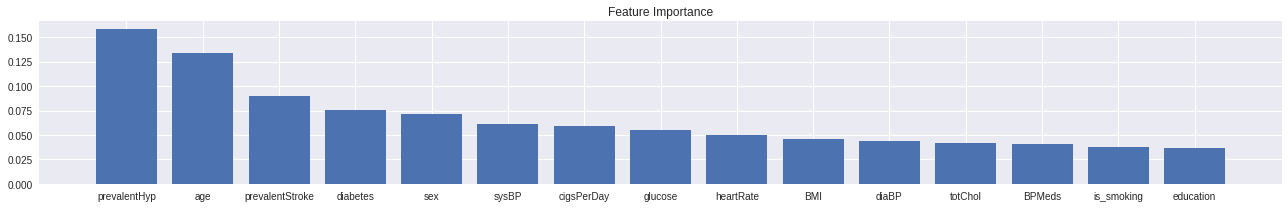

predected percent of people with Cardiovascular Risk  : 0.7374631268436578


XGBRFClassifier(eta=0.05, max_depth=8, min_samples_leaf=40,
                min_samples_split=50, n_estimators=150, random_state=3,
                silent=True)

In [49]:
# Classifier
clf = XGBRFClassifier(silent=True, random_state=3)

# HYperparameter Grid
grid = {'n_estimators' : [50,100,150],
        'max_depth' : [4,6,8],
        'min_samples_split' : [50,100,150],
        'min_samples_leaf' : [40,50],
        'eta' : [0.05,0.08,0.1]}

# GridSearch to find the best parameters
xgb = GridSearchCV(clf, param_grid = grid, scoring = 'f1', cv=5)
xgb.fit(X_train, y_train)

# Analysing the model with best set of parametes
analyse_model(xgb.best_estimator_, X_train, X_test, y_train, y_test)